In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import roc_auc_score, r2_score, accuracy_score
from sklearn.pipeline import Pipeline

from feature_engine.selection import (
    RecursiveFeatureElimination,
    DropConstantFeatures,
    DropDuplicateFeatures,
)

In [2]:
data = pd.read_csv('image_bins_stats_lungs4.csv')
data.shape

(3837, 106)

In [3]:
data.head()

,filename,Bins0,Bins1,Bins2,Bins3,Bins4,Bins5,Bins6,Bins7,rmean_bins0,...,bskew_bins7,bkurto_bins0,bkurto_bins1,bkurto_bins2,bkurto_bins3,bkurto_bins4,bkurto_bins5,bkurto_bins6,bkurto_bins7,class
0,transformed_image_covid_1.png,4722,15567,4,7683,12061,1,8864,16634,77.433079,...,29.26670025,39.092067,21.915792,15.564234,10.232452,12.530200,0.000000,40.674295,31.538221,0
1,transformed_image_covid_2.png,6556,13701,25,9956,9437,0,12114,13747,79.728951,...,33.53821958,28.281468,23.127681,11.979449,17.519198,24.313131,0.000000,38.506228,36.562100,0
2,transformed_image_covid_3.png,10512,12249,1,11502,7743,2,9619,13908,68.987348,...,25.22521593,26.681675,24.442798,0.000000,12.323460,38.083555,4.204482,55.658016,27.952446,0
3,transformed_image_covid_4.png,7987,11854,2,10419,11895,9,11931,11439,94.638788,...,34.51618537,24.056261,28.558353,0.840896,13.800903,27.757483,33.449086,44.809595,37.884099,0
4,transformed_image_covid_5.png,7761,14159,4,10898,10560,9,9153,12992,68.762015,...,32.13721328,27.884767,23.329477,13.445587,16.742312,28.738945,26.135224,49.330295,35.162254,0


In [4]:
data = data.drop(['filename'], axis=1)
data.head()

,Bins0,Bins1,Bins2,Bins3,Bins4,Bins5,Bins6,Bins7,rmean_bins0,rmean_bins1,...,bskew_bins7,bkurto_bins0,bkurto_bins1,bkurto_bins2,bkurto_bins3,bkurto_bins4,bkurto_bins5,bkurto_bins6,bkurto_bins7,class
0,4722,15567,4,7683,12061,1,8864,16634,77.433079,0.202929,...,29.26670025,39.092067,21.915792,15.564234,10.232452,12.530200,0.000000,40.674295,31.538221,0
1,6556,13701,25,9956,9437,0,12114,13747,79.728951,5.447851,...,33.53821958,28.281468,23.127681,11.979449,17.519198,24.313131,0.000000,38.506228,36.562100,0
2,10512,12249,1,11502,7743,2,9619,13908,68.987348,36.388358,...,25.22521593,26.681675,24.442798,0.000000,12.323460,38.083555,4.204482,55.658016,27.952446,0
3,7987,11854,2,10419,11895,9,11931,11439,94.638788,15.529948,...,34.51618537,24.056261,28.558353,0.840896,13.800903,27.757483,33.449086,44.809595,37.884099,0
4,7761,14159,4,10898,10560,9,9153,12992,68.762015,4.809379,...,32.13721328,27.884767,23.329477,13.445587,16.742312,28.738945,26.135224,49.330295,35.162254,0


In [5]:
name = ['rstd_bins0','rstd_bins1','rstd_bins2','rstd_bins3','rstd_bins4','rstd_bins5','rstd_bins6','rstd_bins7','rskew_bins0','rskew_bins1','rskew_bins2','rskew_bins3','rskew_bins4','rskew_bins5','rskew_bins6','rskew_bins7','gstd_bins1','gstd_bins2','gstd_bins3','gstd_bins4','gstd_bins5','gstd_bins6','gstd_bins7','bstd_bins0','bstd_bins1','bstd_bins2','bstd_bins3','bstd_bins4','bstd_bins5','bstd_bins6','bstd_bins7','gskew_bins0','gskew_bins1','gskew_bins2','gskew_bins3','gskew_bins4','gskew_bins5','gskew_bins6','gskew_bins7','bskew_bins0','bskew_bins1','bskew_bins2','bskew_bins3','bskew_bins4','bskew_bins5','bskew_bins6','bskew_bins7','class']
for i in name:
    data[i] = pd.to_numeric(data[i],errors='coerce')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3837 entries, 0 to 3836
Columns: 105 entries, Bins0 to class
dtypes: float64(96), int64(8), object(1)
memory usage: 3.1+ MB


In [7]:
import numpy as np
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(data)

,Bins0,Bins1,Bins2,Bins3,Bins4,Bins5,Bins6,Bins7,rmean_bins0,rmean_bins1,...,bskew_bins7,bkurto_bins0,bkurto_bins1,bkurto_bins2,bkurto_bins3,bkurto_bins4,bkurto_bins5,bkurto_bins6,bkurto_bins7,class
0,4722.0,15567.0,4.0,7683.0,12061.0,1.0,8864.0,16634.0,77.433079,0.202929,...,29.266700,39.092067,21.915792,15.564234,10.232452,12.530200,0.000000,40.674295,31.538221,0.0
1,6556.0,13701.0,25.0,9956.0,9437.0,0.0,12114.0,13747.0,79.728951,5.447851,...,33.538220,28.281468,23.127681,11.979449,17.519198,24.313131,0.000000,38.506228,36.562100,0.0
2,10512.0,12249.0,1.0,11502.0,7743.0,2.0,9619.0,13908.0,68.987348,36.388358,...,25.225216,26.681675,24.442798,0.000000,12.323460,38.083555,4.204482,55.658016,27.952446,0.0
3,7987.0,11854.0,2.0,10419.0,11895.0,9.0,11931.0,11439.0,94.638788,15.529948,...,34.516185,24.056261,28.558353,0.840896,13.800903,27.757483,33.449086,44.809595,37.884099,0.0
4,7761.0,14159.0,4.0,10898.0,10560.0,9.0,9153.0,12992.0,68.762015,4.809379,...,32.137213,27.884767,23.329477,13.445587,16.742312,28.738945,26.135224,49.330295,35.162254,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3832,9870.0,10436.0,13.0,9558.0,9764.0,0.0,16080.0,9815.0,104.708207,27.440974,...,28.826381,16.609479,32.541509,10.841782,18.263777,29.591836,0.000000,43.584547,43.219779,2.0
3833,5946.0,14026.0,1.0,11041.0,12415.0,0.0,7886.0,14221.0,74.044736,1.607016,...,39.246127,30.936390,21.337923,0.000000,9.706518,17.877323,0.000000,45.339391,32.611797,2.0
3834,7330.0,8408.0,6.0,10811.0,18521.0,2.0,6699.0,13759.0,112.515416,7.136774,...,28.790502,42.515393,18.625921,11.891740,14.170267,3.991819,0.000000,36.311970,41.914116,2.0
3835,7630.0,16431.0,1.0,9530.0,3413.0,3.0,17843.0,10685.0,73.122412,24.310145,...,37.426827,20.622111,29.148814,0.000000,20.197666,31.678731,4.769168,50.967873,38.781249,2.0


In [8]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['class'], axis=1),
    data['class'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((2676, 104), (1147, 104))

In [9]:
# the ML model for which we want to select features

model = GradientBoostingClassifier(
    n_estimators=10,
    max_depth=2,
    random_state=10,
)

In [10]:
# Setup the RFE selector

sel = RecursiveFeatureElimination(
    variables=None, # automatically evaluate all numerical variables
    estimator = model, # the ML model
    scoring = 'accuracy', # the metric we want to evalute
    threshold = 0.0005, # the maximum performance drop allowed to remove a feature
    cv=2, # cross-validation
)

# this may take quite a while, because
# we are building a lot of models with cross-validation
sel.fit(X_train, y_train)

RecursiveFeatureElimination(cv=2,
                            estimator=GradientBoostingClassifier(max_depth=2,
                                                                 n_estimators=10,
                                                                 random_state=10),
                            scoring='accuracy', threshold=0.0005,
                            variables=['Bins0', 'Bins1', 'Bins2', 'Bins3',
                                       'Bins4', 'Bins5', 'Bins6', 'Bins7',
                                       'rmean_bins0', 'rmean_bins1',
                                       'rmean_bins2', 'rmean_bins3',
                                       'rmean_bins4', 'rmean_bins5',
                                       'rmean_bins6', 'rmean_bins7',
                                       'rstd_bins0', 'rstd_bins1', 'rstd_bins2',
                                       'rstd_bins3', 'rstd_bins4', 'rstd_bins5',
                                       'rstd_bins6', 'rstd_bins7',
  

In [11]:
# performance of model trained using all features

sel.initial_model_performance_

0.7118834080717489

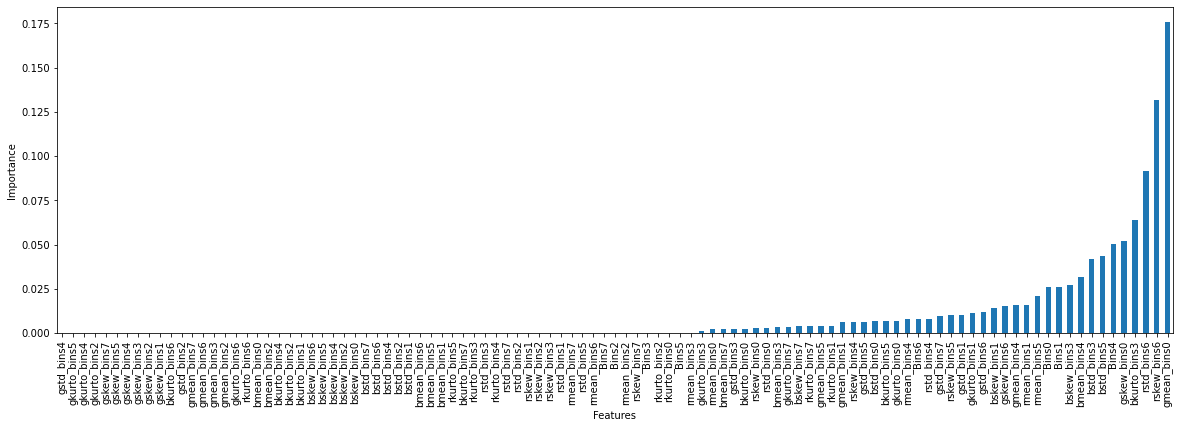

In [12]:
# importance of all features based of initial model

sel.feature_importances_.plot.bar(figsize=(20,6))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

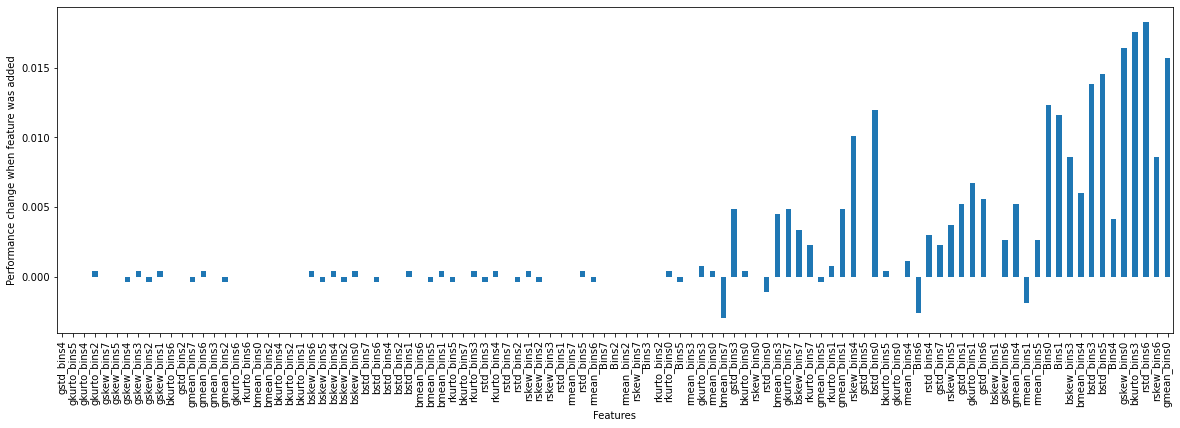

In [13]:
pd.Series(sel.performance_drifts_).plot.bar(figsize=(20,6))
plt.xlabel('Features')
plt.ylabel('Performance change when feature was added')
plt.show()

In [14]:
sel.features_to_drop_

['Bins2',
 'Bins3',
 'Bins5',
 'Bins6',
 'Bins7',
 'rmean_bins0',
 'rmean_bins1',
 'rmean_bins2',
 'rmean_bins3',
 'rmean_bins6',
 'rmean_bins7',
 'rstd_bins0',
 'rstd_bins1',
 'rstd_bins2',
 'rstd_bins3',
 'rstd_bins5',
 'rstd_bins7',
 'rskew_bins0',
 'rskew_bins1',
 'rskew_bins2',
 'rskew_bins3',
 'rskew_bins7',
 'rkurto_bins0',
 'rkurto_bins2',
 'rkurto_bins3',
 'rkurto_bins4',
 'rkurto_bins5',
 'rkurto_bins6',
 'gmean_bins2',
 'gmean_bins3',
 'gmean_bins5',
 'gmean_bins6',
 'gmean_bins7',
 'gstd_bins2',
 'gstd_bins4',
 'gstd_bins5',
 'gskew_bins1',
 'gskew_bins2',
 'gskew_bins3',
 'gskew_bins4',
 'gskew_bins5',
 'gskew_bins7',
 'gkurto_bins0',
 'gkurto_bins2',
 'gkurto_bins4',
 'gkurto_bins5',
 'gkurto_bins6',
 'bmean_bins0',
 'bmean_bins1',
 'bmean_bins2',
 'bmean_bins5',
 'bmean_bins6',
 'bmean_bins7',
 'bstd_bins1',
 'bstd_bins2',
 'bstd_bins4',
 'bstd_bins6',
 'bstd_bins7',
 'bskew_bins0',
 'bskew_bins1',
 'bskew_bins2',
 'bskew_bins4',
 'bskew_bins5',
 'bskew_bins6',
 'bkurto_

In [15]:
# Number of features that will be removed

len(sel.features_to_drop_)

71

In [16]:
# select features

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((2676, 33), (1147, 33))

In [17]:
# now for comparison
# fit the model with the selected features
model.fit(X_train, y_train)

# make predictions
y_pred_test = model.predict(X_test)

# calculate roc-auc
accuracy_final = accuracy_score(y_test, y_pred_test)
print('Test selected features (Accuracy)=%f' % (accuracy_final))

Test selected features (Accuracy)=0.735833


In [21]:
# create a function to build random forests and
# compare its performance in train and test sets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import scikitplot as skplt
import matplotlib.pyplot as plt

def run_randomForests(X_train, X_test, y_train, y_test):
    
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    
#     print('Train set')
#     pred = rf.predict_proba(X_train)
#     print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
#     print('Test set')
#     pred = rf.predict_proba(X_test)
#     print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    y_pred = rf.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred, average='micro')))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred, average='micro')))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred, average='micro')))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [22]:
# embedded methods - Random forests
run_randomForests(X_train, X_test, y_train, y_test)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.79      0.82       364
         1.0       0.72      0.78      0.75       378
         2.0       0.69      0.68      0.68       405

    accuracy                           0.75      1147
   macro avg       0.75      0.75      0.75      1147
weighted avg       0.75      0.75      0.75      1147

Confusion Matrix:
[[287  28  49]
 [ 10 293  75]
 [ 43  87 275]]
Metrics:
Accuracy: 0.745
F1 Score: 0.745
Precision: 0.745
Recall: 0.745
After Cross Validation:
Accuracy: 73.36 %
Standard Deviation: 1.49 %


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

def run_logistic(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    logit = LogisticRegression(penalty='l1', random_state=44, max_iter=1000, solver='liblinear')
    logit.fit(X_train, y_train)
    
#     print('Train set')
#     pred = logit.predict_proba(scaler.transform(X_train))
#     print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
#     print('Test set')
#     pred = logit.predict_proba(scaler.transform(X_test))
#     print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = logit.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred, average='micro')))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred, average='micro')))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred, average='micro')))
    
#     print('After Cross Validation:')
#     accuracies = cross_val_score(estimator = logit, X = X_train, y = y_train, cv = 10)
#     print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
#     print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [24]:
run_logistic(X_train, X_test, y_train, y_test)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81       364
         1.0       0.72      0.84      0.77       378
         2.0       0.74      0.64      0.69       405

    accuracy                           0.76      1147
   macro avg       0.76      0.76      0.76      1147
weighted avg       0.76      0.76      0.75      1147

Confusion Matrix:
[[291  31  42]
 [ 12 317  49]
 [ 51  94 260]]
Metrics:
Accuracy: 0.757
F1 Score: 0.757
Precision: 0.757
Recall: 0.757


In [25]:
# create a function to build logistic regression
# and compare its performance in train and test sets
from sklearn.svm import SVC

def run_kernel_SVM(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    classifier = SVC(kernel = 'rbf', random_state = 0, probability=True)
    classifier.fit(X_train, y_train)
    
#     print('Train set')
#     pred = classifier.predict_proba(scaler.transform(X_train))
#     print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
#     print('Test set')
#     pred = classifier.predict_proba(scaler.transform(X_test))
#     print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred, average='micro')))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred, average='micro')))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred, average='micro')))
    
#     print('After Cross Validation:')
#     accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
#     print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
#     print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [26]:
run_kernel_SVM(X_train, X_test, y_train, y_test)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.62      0.63       364
         1.0       0.53      0.81      0.65       378
         2.0       0.58      0.31      0.41       405

    accuracy                           0.58      1147
   macro avg       0.59      0.58      0.56      1147
weighted avg       0.59      0.58      0.56      1147

Confusion Matrix:
[[227  73  64]
 [ 42 308  28]
 [ 82 196 127]]
Metrics:
Accuracy: 0.577
F1 Score: 0.577
Precision: 0.577
Recall: 0.577


In [27]:
# create a function to build logistic regression
# and compare its performance in train and test sets
from sklearn.neighbors import KNeighborsClassifier

def run_knn(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    classifier.fit(X_train, y_train)
    
#     print('Train set')
#     pred = classifier.predict_proba(scaler.transform(X_train))
#     print('KNN roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
#     print('Test set')
#     pred = classifier.predict_proba(scaler.transform(X_test))
#     print('KNN roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred, average='micro')))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred, average='micro')))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred, average='micro')))
    
#     print('After Cross Validation:')
#     accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
#     print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
#     print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [28]:
run_knn(X_train, X_test, y_train, y_test)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.61      0.70      0.65       364
         1.0       0.59      0.66      0.62       378
         2.0       0.58      0.43      0.49       405

    accuracy                           0.59      1147
   macro avg       0.59      0.60      0.59      1147
weighted avg       0.59      0.59      0.59      1147

Confusion Matrix:
[[256  52  56]
 [ 56 251  71]
 [107 124 174]]
Metrics:
Accuracy: 0.594
F1 Score: 0.594
Precision: 0.594
Recall: 0.594


In [31]:
from sklearn.tree import DecisionTreeClassifier


def run_decision_tree(X_train, X_test, y_train, y_test):

    # function to train and test the performance of logistic regression
    classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier.fit(X_train, y_train)
    
#     print('Train set')
#     pred = classifier.predict_proba(X_train)
#     print('Decision Tree roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
#     print('Test set')
#     pred = classifier.predict_proba(X_test)
#     print('Decision Tree roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred, average='micro')))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred, average='micro')))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred, average='micro')))
    
#     print('After Cross Validation:')
#     accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
#     print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
#     print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [32]:
run_decision_tree(X_train, X_test, y_train, y_test)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.77      0.77       364
         1.0       0.72      0.71      0.71       378
         2.0       0.67      0.67      0.67       405

    accuracy                           0.72      1147
   macro avg       0.72      0.72      0.72      1147
weighted avg       0.72      0.72      0.72      1147

Confusion Matrix:
[[281  29  54]
 [ 26 269  83]
 [ 55  78 272]]
Metrics:
Accuracy: 0.717
F1 Score: 0.717
Precision: 0.717
Recall: 0.717


In [33]:
# create a function to build logistic regression
# and compare its performance in train and test sets
from sklearn.naive_bayes import GaussianNB

def run_naive_bayes(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    
#     print('Train set')
#     pred = classifier.predict_proba(scaler.transform(X_train))
#     print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
#     print('Test set')
#     pred = classifier.predict_proba(scaler.transform(X_test))
#     print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred, average='micro')))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred, average='micro')))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred, average='micro')))
    
#     print('After Cross Validation:')
#     accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
#     print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
#     print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [34]:
run_naive_bayes(X_train, X_test, y_train, y_test)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.68      0.72       364
         1.0       0.65      0.84      0.73       378
         2.0       0.61      0.50      0.55       405

    accuracy                           0.67      1147
   macro avg       0.67      0.67      0.67      1147
weighted avg       0.67      0.67      0.66      1147

Confusion Matrix:
[[249  28  87]
 [ 17 317  44]
 [ 60 143 202]]
Metrics:
Accuracy: 0.670
F1 Score: 0.670
Precision: 0.670
Recall: 0.670


In [35]:
# create a function to build logistic regression
# and compare its performance in train and test sets
from sklearn.svm import SVC

def run_linear_SVM(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    classifier = SVC(kernel = 'linear', random_state = 0, probability=True)
    classifier.fit(X_train, y_train)
    
#     print('Train set')
#     pred = classifier.predict_proba(scaler.transform(X_train))
#     print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
#     print('Test set')
#     pred = classifier.predict_proba(scaler.transform(X_test))
#     print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred, average='micro')))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred, average='micro')))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred, average='micro')))
    
#     print('After Cross Validation:')
#     accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
#     print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
#     print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [ ]:
run_linear_SVM(X_train, X_test, y_train, y_test)